Length of sequences: 295
Number of frames: 1001
['B', 'E', 'G', 'H', 'P', 'S', 'T', '~']
0
Alpha-helix                                          93
Loop (no special secondary structure designation)    56
Extended strand that participates in beta-ladder     53
Hydrogen-bonded turn                                 42
Bend                                                 24
Kappa-helix (poly-proline II helix)                  11
Residue in isolated beta-bridge                       8
3_10-helix                                            8
Name: count, dtype: int64


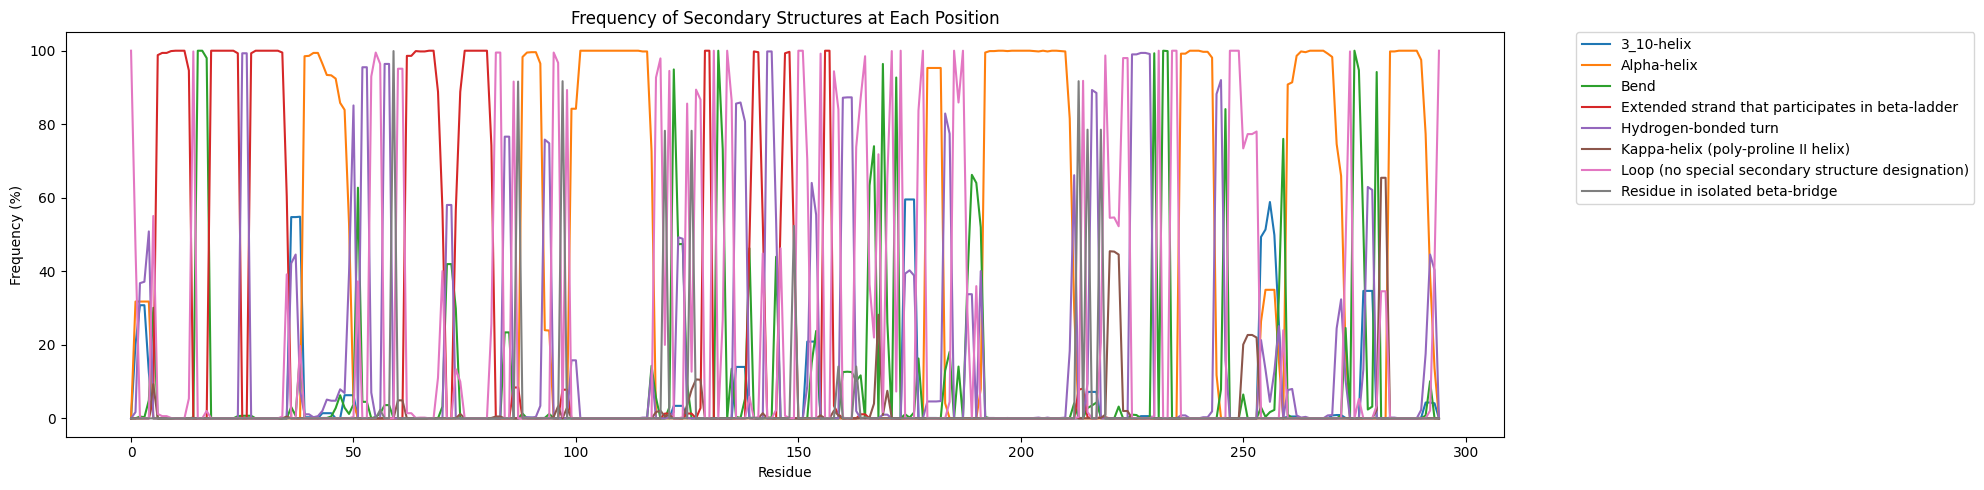

Consensus structure at each position:
                                                 0    \
0  Loop (no special secondary structure designation)   

                                                 1                     2    \
0  Loop (no special secondary structure designation)  Hydrogen-bonded turn   

                    3                     4    \
0  Hydrogen-bonded turn  Hydrogen-bonded turn   

                                                 5    \
0  Loop (no special secondary structure designation)   

                                                6    \
0  Extended strand that participates in beta-ladder   

                                                7    \
0  Extended strand that participates in beta-ladder   

                                                8    \
0  Extended strand that participates in beta-ladder   

                                                9    ...          285  \
0  Extended strand that participates in beta-ladder  ...  Alpha-helix   



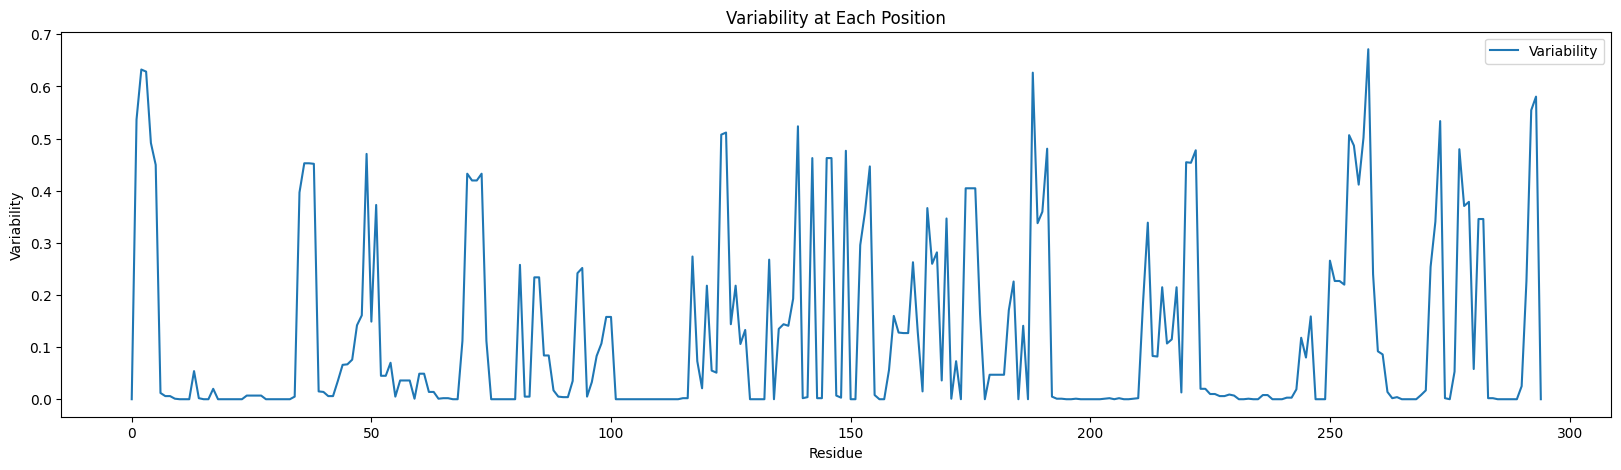

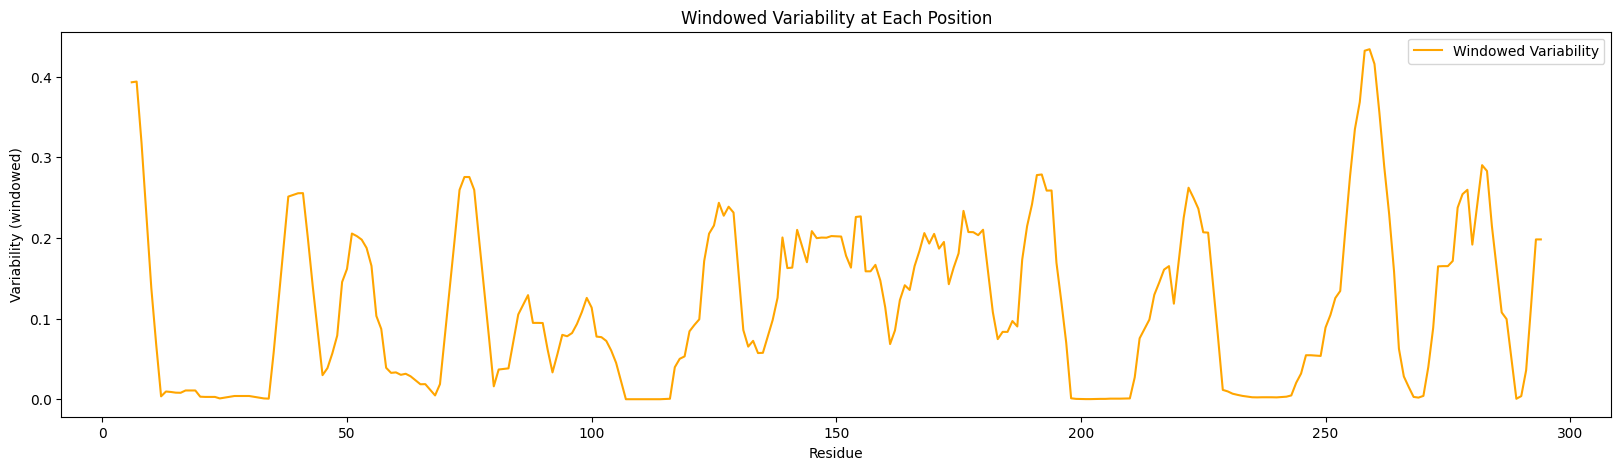

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Baca file .dat dari path yang diberikan
file_path = '/content/dssp.dat'  # Sesuaikan dengan path file yang kamu gunakan
with open(file_path, 'r') as file:
    lines = file.readlines()

# Membuat DataFrame dari isi file
data = [[char for char in line.strip()] for line in lines]
df = pd.DataFrame.from_records(data)

# Menampilkan informasi panjang urutan dan jumlah frame
print(f"Length of sequences: {len(df.columns)}")
print(f"Number of frames: {len(df)}")

# Mengatasi nilai None/NaN dengan mengganti dengan string kosong
df_filled = df.fillna('')

# Mendapatkan elemen unik
unique_elements = sorted(set(df_filled.values.flatten()))
print(unique_elements)

# Menggantikan struktur sekunder dengan kode lengkap
ss_dict = {
    'H': 'Alpha-helix',
    'G': '3_10-helix',
    'I': 'Pi-helix',
    'B': 'Residue in isolated beta-bridge',
    'E': 'Extended strand that participates in beta-ladder',
    'T': 'Hydrogen-bonded turn',
    'S': 'Bend',
    '~': 'Loop (no special secondary structure designation)',
    'P': 'Kappa-helix (poly-proline II helix)',
    '=': 'Break'
}
df_reduced = df_filled.replace(ss_dict)

# Komposisi urutan
print(df_reduced.iloc[0, :].value_counts())

# Variasi posisi dan frekuensi setiap elemen di tiap posisi
position_variation = df_reduced.apply(lambda x: x.value_counts()).fillna(0)

# Konversi ke persentase
position_variation_percent = (position_variation / len(df)) * 100

# Membuat plot untuk semua jenis struktur sekunder dalam satu gambar
plt.figure(figsize=(20, 5))

# Plot semua jenis struktur sekunder
for label in position_variation.index:
    plt.plot(position_variation_percent.loc[label, :], label=label)

# Label dan judul
plt.ylabel('Frequency (%)')
plt.title('Frequency of Secondary Structures at Each Position')
plt.xlabel('Residue')

# Pindahkan legenda ke luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# Simpan plot untuk semua struktur sekunder
plt.savefig('/content/combined_secondary_structure_plot_percent_fixed.png', dpi=600, bbox_inches='tight')
plt.show()

# Evaluasi struktur sekunder pada tiap posisi
consensus = df_reduced.mode(axis=0)
print("Consensus structure at each position:")
print(consensus)

# Threshold untuk konsistensi posisi
threshold = 0.9
consistent_positions = []
variable_positions = []

for position in df_reduced.columns:
    if df_reduced[position].value_counts().max() > threshold * len(df_reduced[position]):
        consistent_positions.append(position)
    else:
        variable_positions.append(position)

print('N consistent positions: ', len(consistent_positions))
print('N variable positions: ', len(variable_positions))

# Hitung variabilitas
variability = 1 - df_reduced.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
print("Variability at each position:")
print(variability)

# Plot variabilitas
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(variability, label='Variability')
ax.set_xlabel('Residue')
ax.set_ylabel('Variability')
ax.set_title('Variability at Each Position')
ax.legend()

# Variabilitas dengan window
window_size = 7
variability_windowed = variability.rolling(window_size).mean()

# Plot variabilitas dengan window
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(variability_windowed, label='Windowed Variability', color='orange')
ax.set_xlabel('Residue')
ax.set_ylabel('Variability (windowed)')
ax.set_title('Windowed Variability at Each Position')
ax.legend()

# Simpan plot variabilitas yang telah di-window
fig.savefig('/content/windowed_variability_percent_fixed.png', dpi=600, bbox_inches='tight')

plt.show()


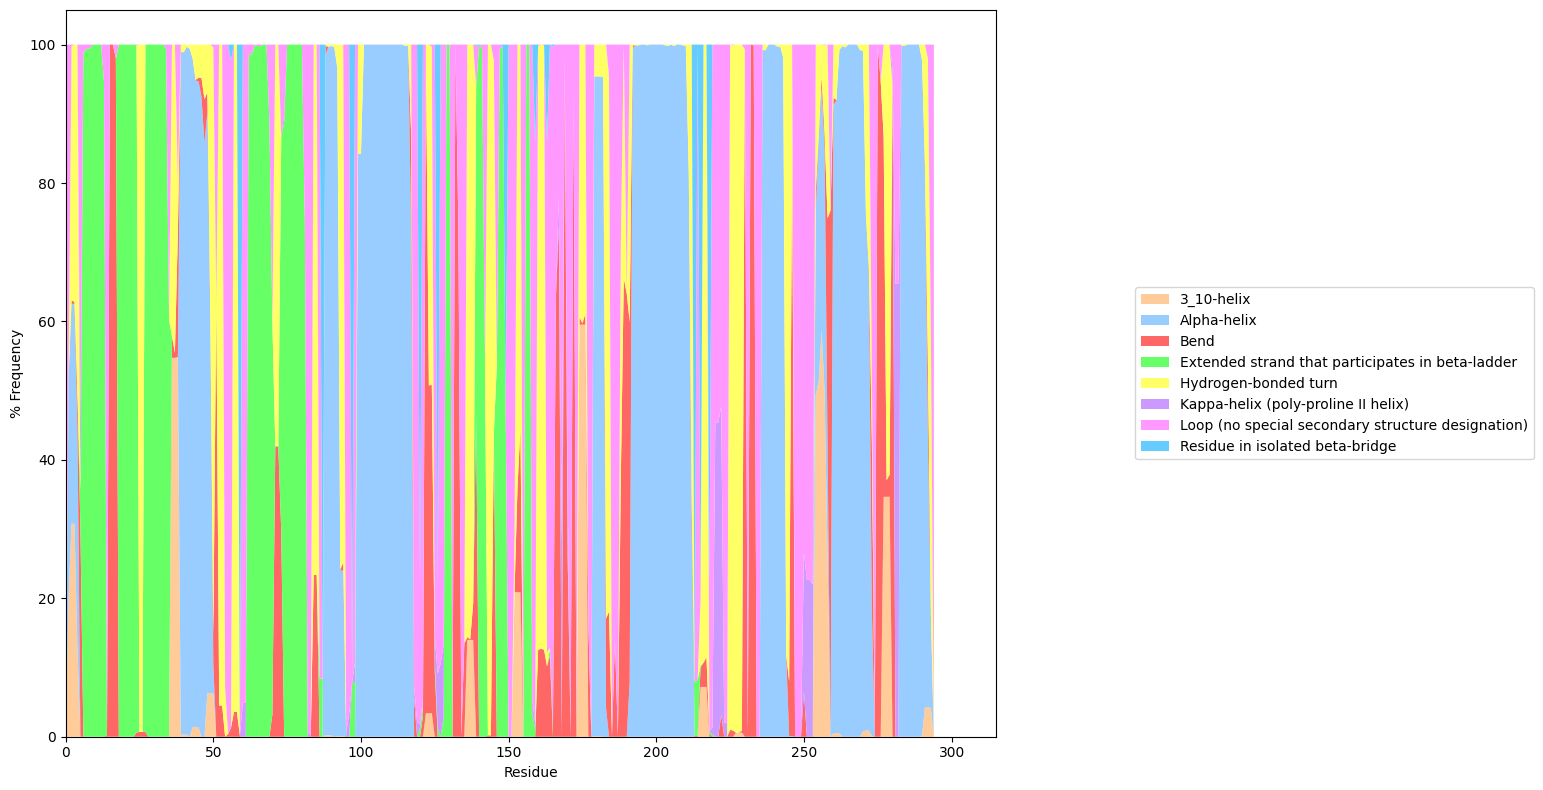

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Baca file .dat dari path yang diberikan
file_path = '/content/dssp.dat'  # Sesuaikan dengan path file yang kamu gunakan
with open(file_path, 'r') as file:
    lines = file.readlines()

# Membuat DataFrame dari isi file
data = [[char for char in line.strip()] for line in lines]
df = pd.DataFrame.from_records(data)

# Mengatasi nilai None/NaN dengan mengganti dengan string kosong
df_filled = df.fillna('')

# Menggantikan struktur sekunder dengan kode lengkap
ss_dict = {
    'H': 'Alpha-helix',
    'G': '3_10-helix',
    'I': 'Pi-helix',
    'B': 'Residue in isolated beta-bridge',
    'E': 'Extended strand that participates in beta-ladder',
    'T': 'Hydrogen-bonded turn',
    'S': 'Bend',
    '~': 'Loop (no special secondary structure designation)',
    'P': 'Kappa-helix (poly-proline II helix)',
    '=': 'Break'
}
df_reduced = df_filled.replace(ss_dict)

# Variasi posisi dan frekuensi setiap elemen di tiap posisi
position_variation = df_reduced.apply(lambda x: x.value_counts()).fillna(0)

# Konversi ke persentase
position_variation_percent = (position_variation / len(df)) * 100

# Transpose DataFrame to ensure the correct shape
position_variation_percent = position_variation_percent.T

# Menyiapkan data untuk plot
structure_types = position_variation_percent.columns
residues = np.arange(len(position_variation_percent))  # Assuming residues are sequential

# Warna yang digunakan untuk setiap struktur
colors = ['#ffcc99', '#99ccff', '#ff6666', '#66ff66', '#ffff66', '#cc99ff', '#ff99ff', '#66ccff', '#cccccc', '#ff99cc']

# Plot data sebagai stacked area plot
plt.figure(figsize=(16, 8))  # Increase the width to 16 for a more stretched x-axis

# Membuat plot area terstacking
plt.stackplot(residues, position_variation_percent.T, labels=structure_types, colors=colors)

# Label dan judul
plt.ylabel('% Frequency')
plt.xlabel('Residue')

# Set xlim to add more space to the right of the plot for symmetry
plt.xlim([0, len(residues) + 20])  # Add extra space to the right for symmetry

# Pindahkan legenda ke luar gambar, lebih jauh ke kanan
plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

plt.tight_layout()

# Simpan gambar
plt.savefig('/content/stacked_secondary_structure_plot_wide.png', dpi=600, bbox_inches='tight')

plt.show()
